In [1]:
from itertools import count
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from importmarvel import create_marvel_graph
from colorspacious import cspace_converter
from collections import OrderedDict
import collections
import pandas as pd
import community
from scipy.optimize import curve_fit
import math

In [2]:
G=nx.read_graphml('connectcomp.graphml')

In [9]:
degfreq=nx.degree_histogram(G)
deglist=list(range(0,len(degfreq)))

In [13]:
#print(degfreq)
#print(deglist)

In [53]:
degfreq1=nx.degree_histogram(G)
deglist1=list(range(0,len(degfreq1)))
for i in range(1,15):
    degfreq1.pop(0)
    deglist1.pop(0)
    
degfreq1.reverse()
deglist1.reverse()    
    
for i in range(1900,1934):
    degfreq1.pop(0)
    deglist1.pop(0)
    
degfreq1.reverse()
deglist1.reverse()   

In [67]:
len(degfreq1)
print(deglist1)

[14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 

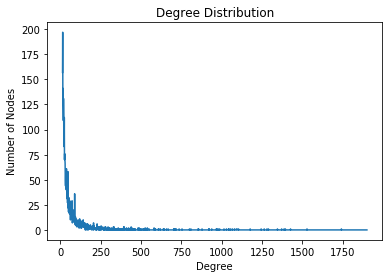

In [55]:
#DEGREE DISTRIBUTION
plt.plot(deglist1,degfreq1)

plt.xlabel('Degree', fontdict=None, labelpad=None)
plt.ylabel('Number of Nodes', fontdict=None, labelpad=None)

plt.title('Degree Distribution', fontdict=None, loc='center', pad=None)
         
plt.show()

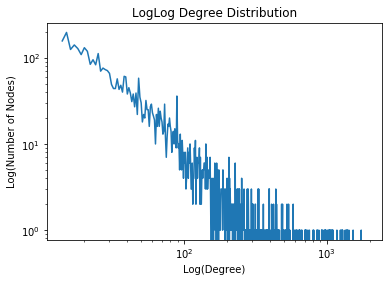

In [56]:
#LOGLOG DEGREE DISTRIBUTION
plt.loglog(deglist1,degfreq1)

plt.xlabel('Log(Degree)', fontdict=None, labelpad=None)
plt.ylabel('Log(Number of Nodes)', fontdict=None, labelpad=None)

plt.title('LogLog Degree Distribution', fontdict=None, loc='center', pad=None)

plt.show()

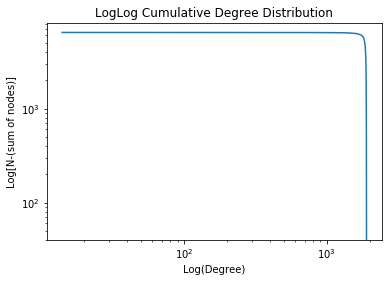

In [57]:
#LOGLOG CUMULATIVE DEGREE DISTRIBUTION
cumdegfreq1=[0]*1886
sum=0;

for i in range(0,1886):
    sum+=degfreq[i]
    cumdegfreq1[i]=sum
cumdegfreq1.reverse()
    
plt.loglog(deglist1,cumdegfreq1)

plt.xlabel('Log(Degree)', fontdict=None, labelpad=None)
plt.ylabel('Log[N-(sum of nodes)]', fontdict=None, labelpad=None)

plt.title('LogLog Cumulative Degree Distribution', fontdict=None, loc='center', pad=None)

plt.show()

In [134]:
def powerlaw(x, m, c, c0):
    return c0 + x**m * c

#def powerlaw_with_cutoff(x, m, k, l, c0):
#    return  (x**m)* k**(x/l) +c0

def powerlaw_with_cutoff(x, m, k, l, c0):
    return  math.pow(x+c0,m)*math.pow(k,x/l)+c0

def other_fit(x, m,a):
    return  a*math.pow(x,m)

In [123]:
x = np.asarray(deglist1)
y = np.asarray(degfreq1)

#sol1 = curve_fit(powerlaw_with_cutoff, x, y, maxfev=50000,p0 =np.asarray([0.5,10,0.002,100]))

#no luck finding a fit. I will simply try values until I find a decent fit

In [124]:
fit1=[0] * len(deglist1)
for i in range(14,1899):
    fit1[i-14]= powerlaw_with_cutoff(i,2.92276853e-05,-3.20783483e+05, 3.20847944e+05,100)

plt.plot(x, y)
plt.plot(x,np.asarray(fit1))

plt.legend(['Actual curve', 'fit1'], loc='upper left')

plt.show()

ValueError: math domain error

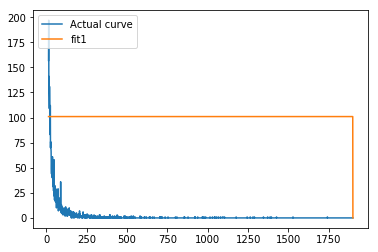

In [126]:
fit1=[0] * len(deglist1)
for i in range(14,1899):
    fit1[i-14]= powerlaw_with_cutoff(i,-0.0003,0.0,1000000.0,100.0)

plt.plot(x, y)
plt.plot(x,np.asarray(fit1))

plt.legend(['Actual curve', 'fit1'], loc='upper left')

plt.show()

In [119]:
#print(fit1)

In [149]:
#fit1=[0] * len(deglist1)
#for i in range(14,1899):
#    fit1[i-14]= (i+100)**-0.3*100
#    #powerlaw_with_cutoff(i,-0.0003,10.0,1000000.0,100.0)
#print(fit1)


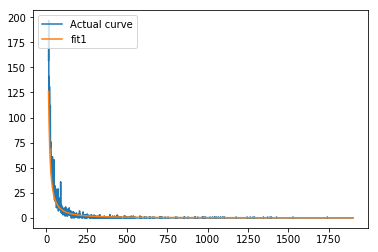

In [171]:
fit1=[0] * len(deglist1)
for i in range(14,1899):
    fit1[i-14]= powerlaw(i,-1.43,5500,0)

plt.plot(x, y)
plt.plot(x,np.asarray(fit1))

plt.legend(['Actual curve', 'fit1'], loc='upper left')

plt.show()

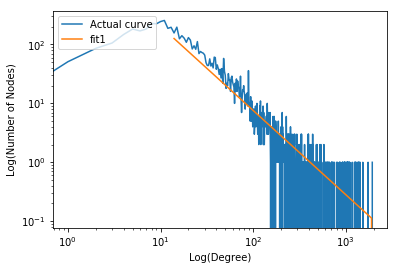

In [172]:
#LOGLOG DEGREE DISTRIBUTION
plt.loglog(deglist,degfreq)

plt.xlabel('Log(Degree)', fontdict=None, labelpad=None)
plt.ylabel('Log(Number of Nodes)', fontdict=None, labelpad=None)

plt.plot(x,np.asarray(fit1))

plt.legend(['Actual curve', 'fit1'], loc='upper left')

plt.show()

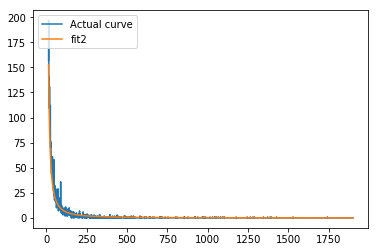

In [169]:
fit2=[0] * len(deglist1)
for i in range(14,1899):
    fit2[i-14]= powerlaw(i,-1.5,8000,0)

plt.plot(x, y)
plt.plot(x,np.asarray(fit1))

plt.legend(['Actual curve', 'fit2'], loc='upper left')

plt.show()

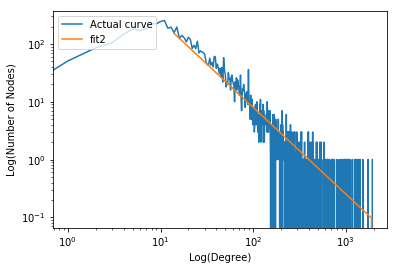

In [170]:
#LOGLOG DEGREE DISTRIBUTION
plt.loglog(deglist,degfreq)

plt.xlabel('Log(Degree)', fontdict=None, labelpad=None)
plt.ylabel('Log(Number of Nodes)', fontdict=None, labelpad=None)

plt.plot(x,np.asarray(fit2))

plt.legend(['Actual curve', 'fit2'], loc='upper left')

plt.show()